# Bike Sharing Demand

datetime - hourly date + timestamp<br>
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter<br>
holiday - whether the day is considered a holiday<br>
workingday - whether the day is neither a weekend nor holiday<br>
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br> 
temp - temperature in Celsius<br>
atemp - "feels like" temperature in Celsius<br>
humidity - relative humidity<br>
windspeed - wind speed<br>
casual - number of non-registered user rentals initiated<br>
registered - number of registered user rentals initiated<br>
count - number of total rentals<br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [4]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
import missingno as msno

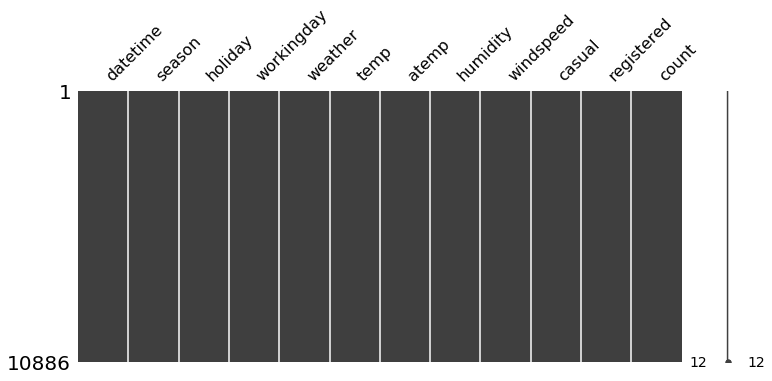

In [7]:
msno.matrix(train,figsize=(12,5))

In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


# Data Processing

In [10]:
print(train.shape)
train = train[np.abs(train["count"]-train["count"].mean())<=(3*train["count"].std())]
print(train.shape)

(10886, 12)
(10739, 12)


### -Datetime

In [11]:
print(train.shape)
train["dt_year"] = train["datetime"].dt.year
train["dt_month"] = train["datetime"].dt.month
train["dt_day"] = train["datetime"].dt.day
train["dt_hour"] = train["datetime"].dt.hour
train["dt_minute"] = train["datetime"].dt.minute
train["dt_second"] = train["datetime"].dt.second
train["dt_dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)

train[["dt_year", "dt_month", "dt_day", "dt_hour", "dt_minute", "dt_second", "dt_dayofweek"]].head()

(10739, 12)
(10739, 19)


,dt_year,dt_month,dt_day,dt_hour,dt_minute,dt_second,dt_dayofweek
0,2011,1,1,0,0,0,5
1,2011,1,1,1,0,0,5
2,2011,1,1,2,0,0,5
3,2011,1,1,3,0,0,5
4,2011,1,1,4,0,0,5


In [12]:
print(train.shape)
train.loc[train["dt_dayofweek"] == 0, "dt_dayofweek_str"] = "Monday"
train.loc[train["dt_dayofweek"] == 1, "dt_dayofweek_str"] = "Tuesday"
train.loc[train["dt_dayofweek"] == 2, "dt_dayofweek_str"] = "Wednesday"
train.loc[train["dt_dayofweek"] == 3, "dt_dayofweek_str"] = "Thursday"
train.loc[train["dt_dayofweek"] == 4, "dt_dayofweek_str"] = "Friday"
train.loc[train["dt_dayofweek"] == 5, "dt_dayofweek_str"] = "Saturday"
train.loc[train["dt_dayofweek"] == 6, "dt_dayofweek_str"] = "Sunday"

print(train.shape)

train[["dt_dayofweek_str"]].head()

(10739, 19)
(10739, 20)


,dt_dayofweek_str
0,Saturday
1,Saturday
2,Saturday
3,Saturday
4,Saturday


In [13]:
print(train.shape)
test["dt_year"] = test["datetime"].dt.year
test["dt_month"] = test["datetime"].dt.month
test["dt_day"] = test["datetime"].dt.day
test["dt_hour"] = test["datetime"].dt.hour
test["dt_minute"] = test["datetime"].dt.minute
test["dt_second"] = test["datetime"].dt.second
test["dt_dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test[["dt_year", "dt_month", "dt_day", "dt_hour", "dt_minute", "dt_second", "dt_dayofweek"]].head()

(10739, 20)
(6493, 16)


,dt_year,dt_month,dt_day,dt_hour,dt_minute,dt_second,dt_dayofweek
0,2011,1,20,0,0,0,3
1,2011,1,20,1,0,0,3
2,2011,1,20,2,0,0,3
3,2011,1,20,3,0,0,3
4,2011,1,20,4,0,0,3


In [14]:
print(train.shape)
test.loc[test["dt_dayofweek"] == 0, "dt_dayofweek_str"] = "Monday"
test.loc[test["dt_dayofweek"] == 1, "dt_dayofweek_str"] = "Tuesday"
test.loc[test["dt_dayofweek"] == 2, "dt_dayofweek_str"] = "Wednesday"
test.loc[test["dt_dayofweek"] == 3, "dt_dayofweek_str"] = "Thursday"
test.loc[test["dt_dayofweek"] == 4, "dt_dayofweek_str"] = "Friday"
test.loc[test["dt_dayofweek"] == 5, "dt_dayofweek_str"] = "Saturday"
test.loc[test["dt_dayofweek"] == 6, "dt_dayofweek_str"] = "Sunday"

print(test.shape)
test[["dt_dayofweek_str"]].head()

(10739, 20)
(6493, 17)


,dt_dayofweek_str
0,Thursday
1,Thursday
2,Thursday
3,Thursday
4,Thursday


### -Season

In [15]:
train["season"].unique()

array([1, 2, 3, 4])

In [16]:
print(train.shape)
train["season_1"] = train["season"] == 1
train["season_2"] = train["season"] == 2
train["season_3"] = train["season"] == 3
train["season_4"] = train["season"] == 4

print(train.shape)

(10739, 20)
(10739, 24)


In [17]:
print(test.shape)
test["season_1"] = test["season"] == 1
test["season_2"] = test["season"] == 2
test["season_3"] = test["season"] == 3
test["season_4"] = test["season"] == 4

print(test.shape)

(6493, 17)
(6493, 21)


### -Weather

In [18]:
train["weather"].unique()

array([1, 2, 3, 4])

In [19]:
print(train.shape)
train["weather_1"] = train["weather"] == 1
train["weather_2"] = train["weather"] == 2
train["weather_3"] = train["weather"] == 3
train["weather_4"] = train["weather"] == 4

print(train.shape)

(10739, 24)
(10739, 28)


In [20]:
print(test.shape)
test["weather_1"] = test["weather"] == 1
test["weather_2"] = test["weather"] == 2
test["weather_3"] = test["weather"] == 3
test["weather_4"] = test["weather"] == 4

print(test.shape)

(6493, 21)
(6493, 25)


### -Windspeed

In [65]:
windspeed_0 = train["windspeed"] == 0
windsp_0 = train[windspeed_0]
windsp = train[~windspeed_0]
print(windsp_0.shape, windsp.shape)

(1297, 33) (9442, 33)


In [67]:
windsp_0_refine = windsp_0.drop(['windspeed', 'casual', 'registered', 'count', 'datetime', 
                                 'dt_dayofweek_str', 'dt_year_str', 'dt_month_str', 'dt_year_month'], axis=1)
print(windsp_0_refine.shape)

windsp_refine_data = windsp.drop(['windspeed', 'casual', 'registered', 'count', 'datetime', 
                                  'dt_dayofweek_str', 'dt_year_str', 'dt_month_str', 'dt_year_month'], axis=1)
print(windsp_refine_data.shape)

(1297, 24)
(9442, 24)


In [70]:
windsp_refine_label = windsp["windspeed"]

In [69]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1, random_state = 66)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=66, verbose=0, warm_start=False)

In [71]:
model.fit(windsp_refine_data, windsp_refine_label)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=66, verbose=0, warm_start=False)

In [72]:
predict_windsp_0 = model.predict(windsp_0_refine)
predict_windsp_0[:5]

array([8.731708, 8.64166 , 8.651777, 8.75221 , 8.701893])

In [74]:
windsp_0["windspeed"] = predict_windsp_0
print(windsp_0.shape)

(1297, 33)


/Users/myeongjintak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
train.loc[train["windspeed"] == 0, "windspeed"] = windsp_0["windspeed"]
print(train[train["windspeed"] == 0].shape)

(0, 33)


### -Categorization

In [21]:
categoryVariableList = ["dt_hour","dt_dayofweek","dt_month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    train[var] = train[var].astype("category")
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10739 entries, 0 to 10885
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          10739 non-null  datetime64[ns]
 1   season            10739 non-null  category      
 2   holiday           10739 non-null  category      
 3   workingday        10739 non-null  category      
 4   weather           10739 non-null  category      
 5   temp              10739 non-null  float64       
 6   atemp             10739 non-null  float64       
 7   humidity          10739 non-null  int64         
 8   windspeed         10739 non-null  float64       
 9   casual            10739 non-null  int64         
 10  registered        10739 non-null  int64         
 11  count             10739 non-null  int64         
 12  dt_year           10739 non-null  int64         
 13  dt_month          10739 non-null  category      
 14  dt_day            1073

# Visualization

### -Datetime

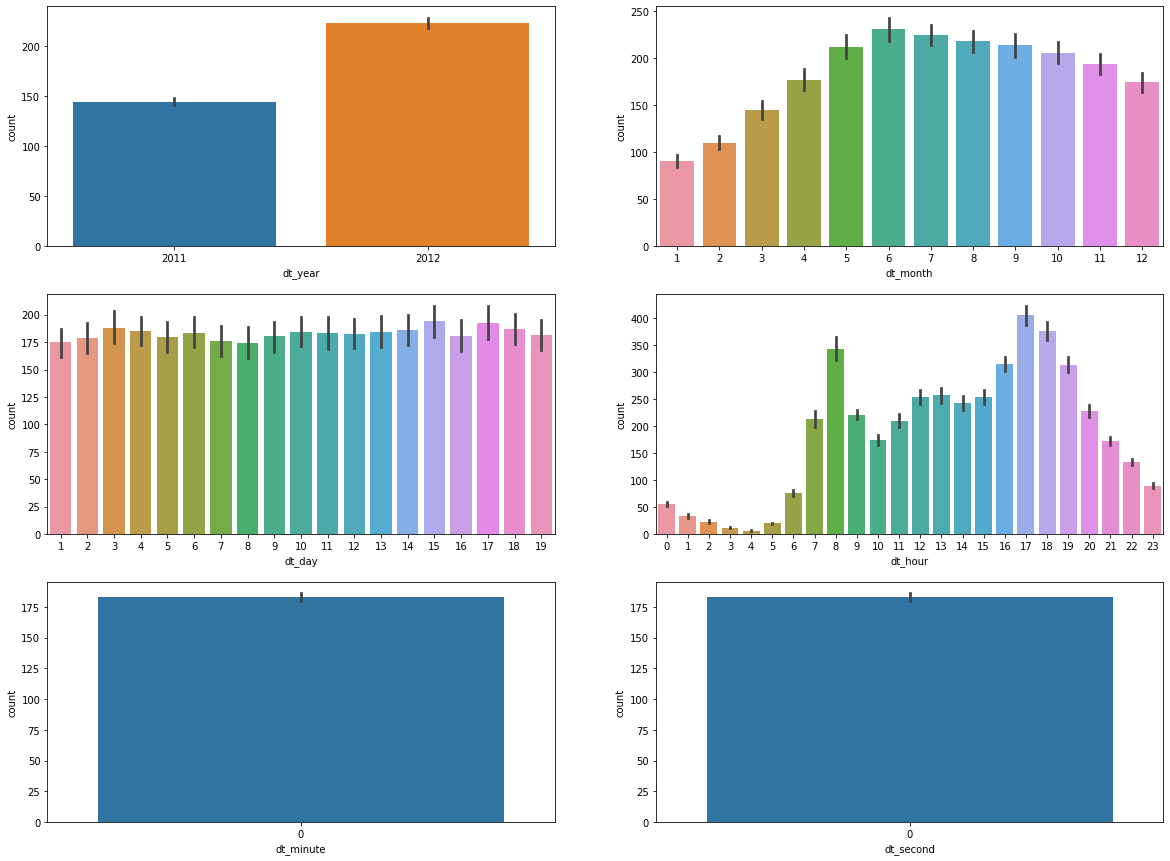

In [22]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)

figure.set_size_inches(20, 15)

sns.barplot(data=train, x="dt_year", y="count", ax=ax1)
sns.barplot(data=train, x="dt_month", y="count", ax=ax2)
sns.barplot(data=train, x="dt_day", y="count", ax=ax3)
sns.barplot(data=train, x="dt_hour", y="count", ax=ax4)
sns.barplot(data=train, x="dt_minute", y="count", ax=ax5)
sns.barplot(data=train, x="dt_second", y="count", ax=ax6)

In [23]:
print(train.shape)
train["dt_year_str"] = train["dt_year"].astype("str")
train["dt_month_str"] = train["dt_month"].astype("str")
train["dt_year_month"] = train["dt_year_str"] + " - " + train["dt_month_str"]

print(train.shape)
train[["dt_year_str", "dt_month_str", "dt_year_month"]].head()

(10739, 28)
(10739, 31)


,dt_year_str,dt_month_str,dt_year_month
0,2011,1,2011 - 1
1,2011,1,2011 - 1
2,2011,1,2011 - 1
3,2011,1,2011 - 1
4,2011,1,2011 - 1


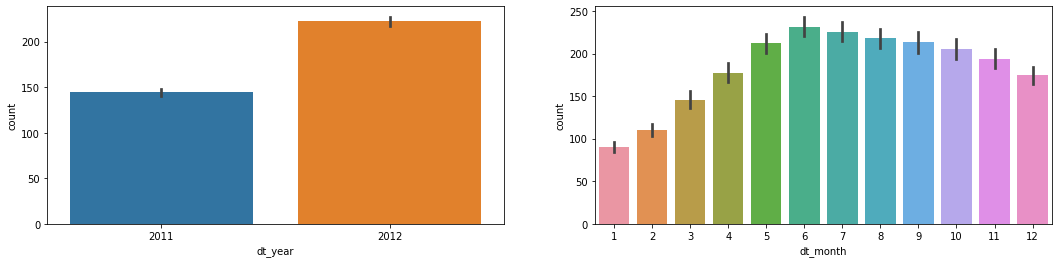

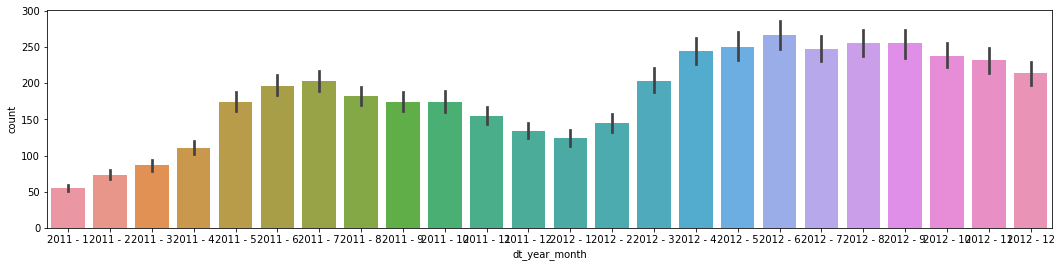

In [24]:
figure, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="dt_year", y="count", ax=ax1)
sns.barplot(data=train, x="dt_month", y="count", ax=ax2)

figure, ax3 = plt.subplots(nrows = 1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="dt_year_month", y="count", ax=ax3)

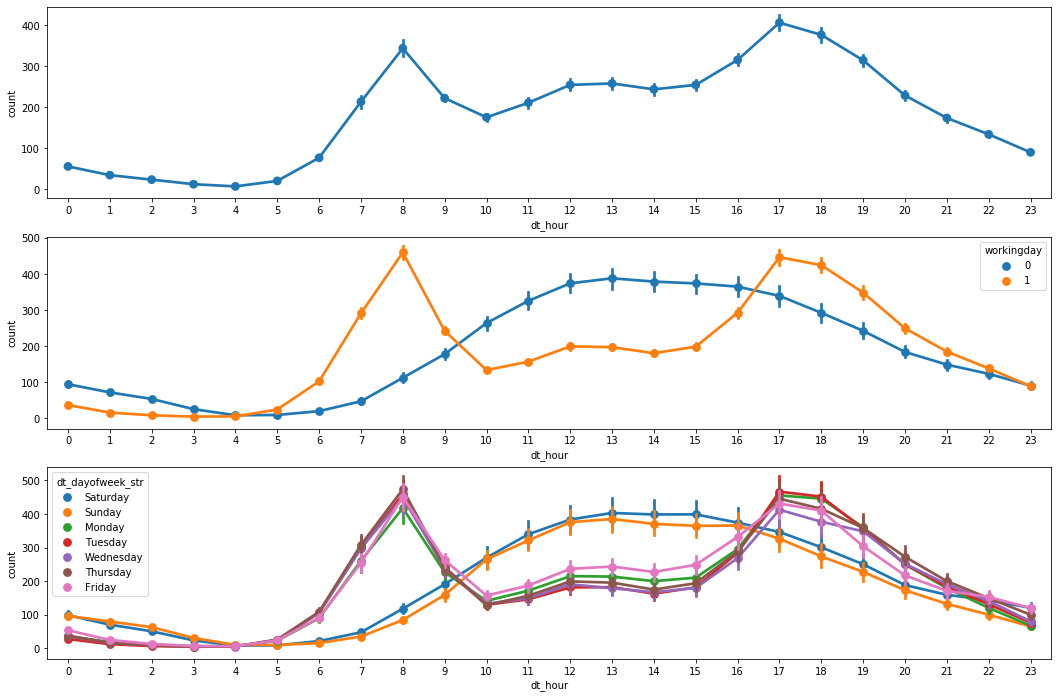

In [25]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1)

figure.set_size_inches(18, 12)

sns.pointplot(data=train, x="dt_hour", y="count", ax=ax1)
sns.pointplot(data=train, x="dt_hour", y="count", hue="workingday", ax=ax2)
sns.pointplot(data=train, x="dt_hour", y="count", hue="dt_dayofweek_str", ax=ax3)

### -Weather

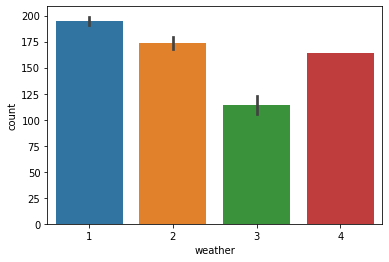

In [26]:
sns.barplot(data=train, x="weather", y="count")

In [27]:
#print(train.count())
print(train["weather"].value_counts())

1    7076
2    2809
3     853
4       1
Name: weather, dtype: int64


### -temp, atemp

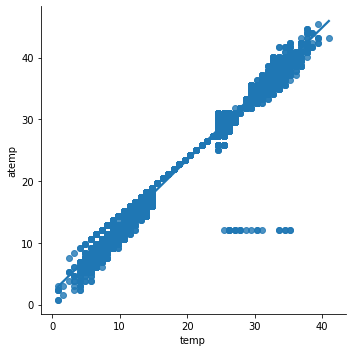

In [28]:
sns.lmplot(data=train, x="temp", y="atemp")

In [29]:
temp_out = (train["temp"] > 20) & (train["temp"] < 40)
atemp_out = (train["atemp"] > 10) & (train["atemp"] < 20)
#train[atemp_out & temp_out].shape
train[~(atemp_out & temp_out)].shape

(10716, 31)

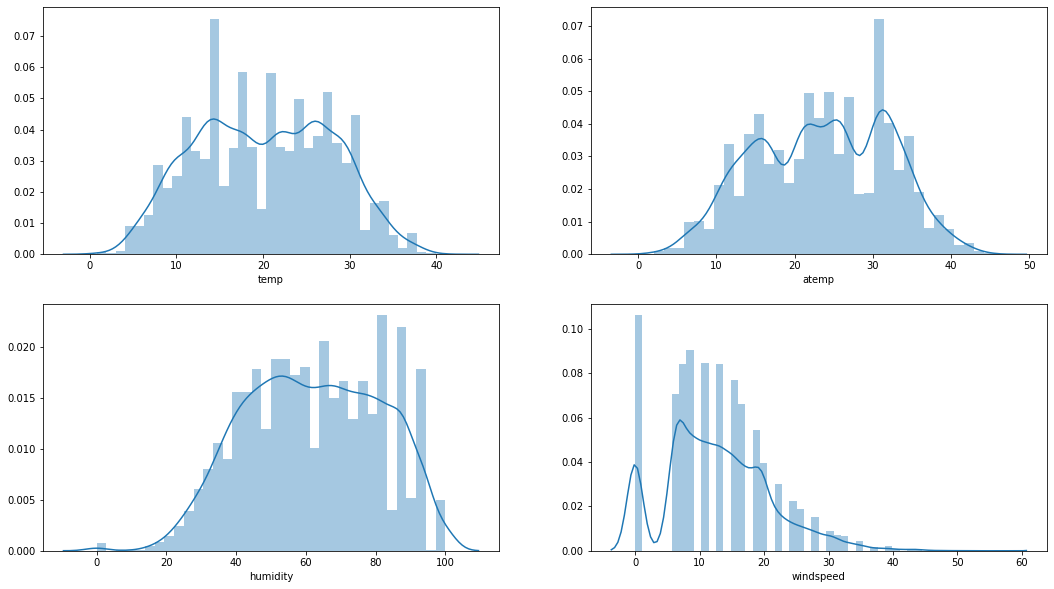

In [30]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)
figure.set_size_inches(18, 10)

sns.distplot(train["temp"], ax=ax1)
sns.distplot(train["atemp"], ax=ax2)
sns.distplot(train["humidity"], ax=ax3)
sns.distplot(train["windspeed"], ax=ax4)

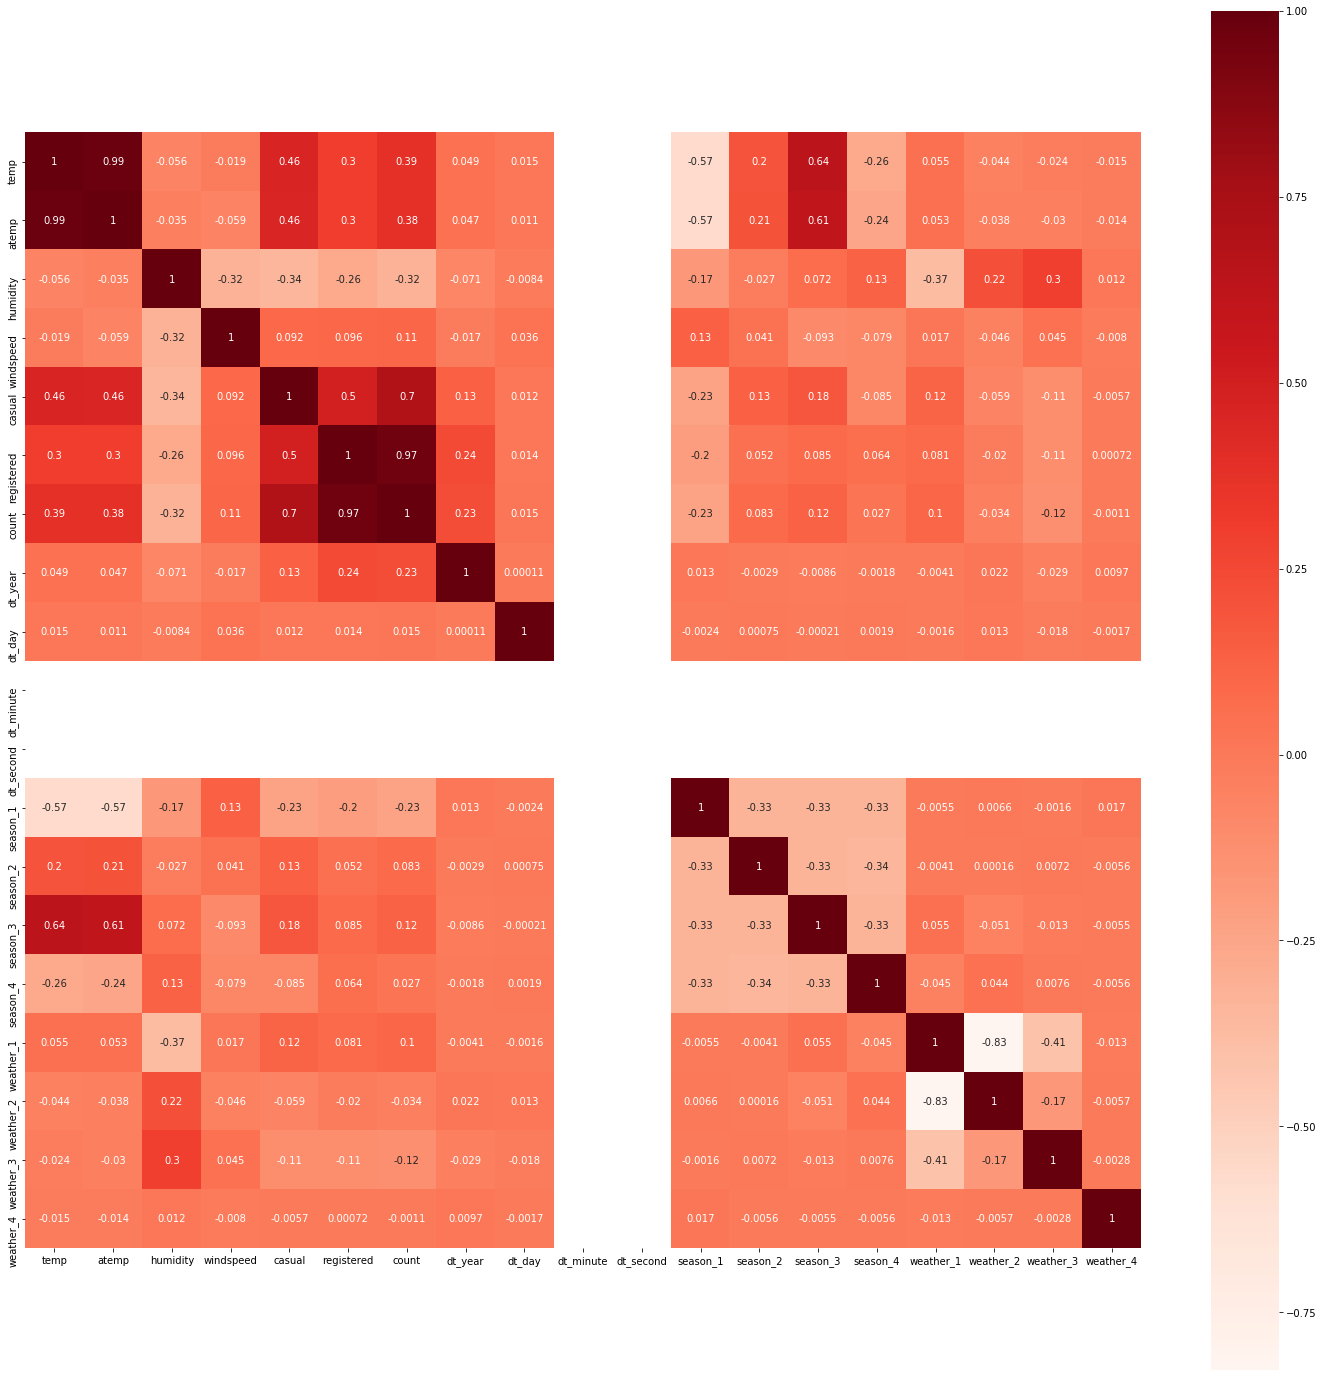

In [31]:
figure = plt.figure(figsize=(25, 25))

sns.heatmap(train.corr(), annot=True, square=True, cmap="Reds")

In [32]:
train["count"].describe()

count    10739.000000
mean       183.003818
std        166.681429
min          1.000000
25%         41.000000
50%        141.000000
75%        276.000000
max        734.000000
Name: count, dtype: float64

In [33]:
print(train.shape)

train["log_count"] = np.log(train["count"] + 1)

print(train.shape)
train[["count", "log_count"]].head()

(10739, 31)
(10739, 32)


,count,log_count
0,16,2.833213
1,40,3.713572
2,32,3.496508
3,13,2.639057
4,1,0.693147


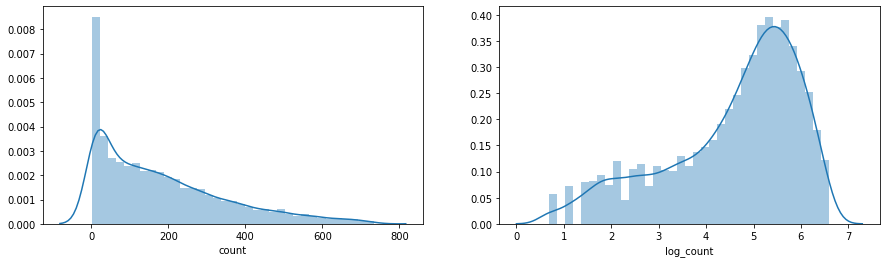

In [34]:
figure, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)

figure.set_size_inches(15, 4)

sns.distplot(train['count'], ax=ax1)
sns.distplot(train['log_count'], ax=ax2)

In [35]:
print(train.shape)

train['count(recover)'] = np.exp(train['log_count']) - 1

print(train.shape)
train[['count', 'log_count', 'count(recover)']].head()

(10739, 32)
(10739, 33)


,count,log_count,count(recover)
0,16,2.833213,16.0
1,40,3.713572,40.0
2,32,3.496508,32.0
3,13,2.639057,13.0
4,1,0.693147,1.0


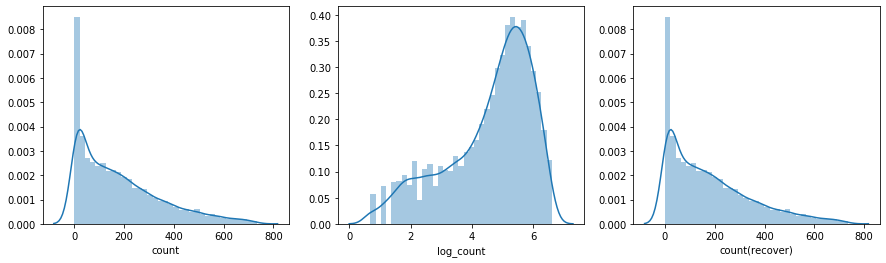

In [36]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3)

figure.set_size_inches(15, 4)

sns.distplot(train['count'], ax=ax1)
sns.distplot(train['log_count'], ax=ax2)
sns.distplot(train['count(recover)'], ax=ax3)

# Learning

In [76]:
print(train.columns)
print(train.columns.shape)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'dt_year', 'dt_month', 'dt_day', 'dt_hour', 'dt_minute', 'dt_second',
       'dt_dayofweek', 'dt_dayofweek_str', 'season_1', 'season_2', 'season_3',
       'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'dt_year_str', 'dt_month_str', 'dt_year_month', 'log_count',
       'count(recover)'],
      dtype='object')
(33,)


In [77]:
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "dt_year", "dt_hour", "dt_dayofweek"]
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'dt_year',
 'dt_hour',
 'dt_dayofweek']

In [78]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(10739, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dt_year,dt_hour,dt_dayofweek
0,1,0,0,1,9.84,14.395,81,8.731708,2011,0,5
1,1,0,0,1,9.02,13.635,80,8.641660,2011,1,5
2,1,0,0,1,9.02,13.635,80,8.651777,2011,2,5
3,1,0,0,1,9.84,14.395,75,8.752210,2011,3,5
4,1,0,0,1,9.84,14.395,75,8.701893,2011,4,5


In [79]:
#label_name = "count"
label_name = "log_count"
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(10739,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: log_count, dtype: float64

In [80]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dt_year,dt_hour,dt_dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


# Use Decicsion Tree

In [81]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(max_depth=5)
# model

# Use Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1, random_state = 66)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=66, verbose=0, warm_start=False)

# Evaluate

In [83]:
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
#     log_predict = np.log(predict + 1)
#     log_actual = np.log(actual + 1)
    
#     dist = log_predict - log_actual

    dist = predict - actual
    
    sqr_dist = dist ** 2
    
    mean_sqr_dist = sqr_dist.mean()
    
    score = np.sqrt(mean_sqr_dist)
    
    return score

rsmle_score = make_scorer(rmsle)
rsmle_score

make_scorer(rmsle)

# Score

In [84]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model,
                       X_train, y_train,
                       cv=20, 
                       scoring = rsmle_score).mean()

print("Score = {0:.5f}".format(score))

Score = 0.35589


# Hyperparameter Tuning

In [85]:
from sklearn.ensemble import RandomForestRegressor

best_n_estimators = 3000
best_max_depth = 83
best_max_features = 0.851358

model = RandomForestRegressor(n_estimators=best_n_estimators,
                              max_depth=best_max_depth,
                              max_features=best_max_features,
                              random_state=66,
                              n_jobs=-1)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=83, max_features=0.851358, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3000, n_jobs=-1, oob_score=False,
                      random_state=66, verbose=0, warm_start=False)

# Fit

In [86]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=83, max_features=0.851358, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3000, n_jobs=-1, oob_score=False,
                      random_state=66, verbose=0, warm_start=False)

# Predict

In [87]:
predictions_log = model.predict(X_test)
print(predictions.shape)
predictions[:10]

(6493,)


array([ 11.03089439,   4.73516861,   3.56959796,   3.37944862,
         2.78314049,   6.49013715,  38.28269285, 107.27099462,
       238.76682657, 135.32695764])

In [88]:
predictions = np.exp(predictions_log) - 1

print(predictions.shape)

predictions

(6493,)


array([11.47433824,  4.93070652,  3.29687406, ..., 99.2085887 ,
       97.05877176, 46.97725633])

# Submit

In [89]:
submission = pd.read_csv("data/sampleSubmission.csv")

print(submission.shape)

submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [90]:
submission["count"] = predictions

print(predictions.shape)

submission.head()

(6493,)


,datetime,count
0,2011-01-20 00:00:00,11.474338
1,2011-01-20 01:00:00,4.930707
2,2011-01-20 02:00:00,3.296874
3,2011-01-20 03:00:00,2.978957
4,2011-01-20 04:00:00,2.596011


In [91]:
submission.to_csv("data/bike_practice_200218_1.csv", index=False)
# bike_practice_200218.csv   : 0.39672
# bike_practice_200218_1.csv : 0.39098